Q1. Web Scraping with BeautifulSoup

In [1]:
!pip install requests
!pip install beautifulsoup4


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://books.toscrape.com/"

In [4]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [5]:
books = soup.find_all('article', class_='product_pod')


In [7]:
titles = []
prices = []

for book in books[:10]:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text.strip()

    titles.append(title)
    prices.append(price)

In [8]:
df = pd.DataFrame({
    'Title': titles,
    'Price': prices
})


In [9]:
print("Scraped Book Data:")
print(df)

Scraped Book Data:
                                               Title   Price
0                               A Light in the Attic  £51.77
1                                 Tipping the Velvet  £53.74
2                                         Soumission  £50.10
3                                      Sharp Objects  £47.82
4              Sapiens: A Brief History of Humankind  £54.23
5                                    The Requiem Red  £22.65
6  The Dirty Little Secrets of Getting Your Dream...  £33.34
7  The Coming Woman: A Novel Based on the Life of...  £17.93
8  The Boys in the Boat: Nine Americans and Their...  £22.60
9                                    The Black Maria  £52.15


In [10]:
df.to_csv('books_top_10.csv', index=False)
print("\nSaved to books_top_10.csv")


Saved to books_top_10.csv


In [11]:
from google.colab import files
files.download("books_top_10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Q2: API-Based News Collection

In [12]:
import requests
import json

In [38]:
api_key = "dafc74ceeec64052aadfc9f7caa4fb92"

In [40]:
url = "https://newsapi.org/v2/everything"
params = {
    'apiKey': api_key,
    'q': 'technology',
    'language': 'en',
    'pageSize': 10,
}


In [35]:
response = requests.get(url, params=params)
data = response.json()

In [42]:
if data['status'] == 'ok':
    results = []
    for article in data['articles']:
        results.append({
            'title': article['title'],
            'source': article['source']['name'],
            'publishedAt': article['publishedAt']
        })

    with open('top_tech_headlines_india.json', 'w') as f:
        json.dump(results, f, indent=4)

    print("Top 10 Technology Headlines in India:\n")
    for i, item in enumerate(results, 1):
        print(f"{i}. {item['title']} ({item['source']}) — {item['publishedAt']}")

    print("\nSaved to 'top_tech_headlines_india.json'")
else:
    print("Error:", data.get('message', 'Something went wrong'))

Top 10 Technology Headlines in India:


Saved to 'top_tech_headlines_india.json'


In [43]:
from google.colab import files
files.download('top_tech_headlines_india.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Q3: Weather Data Collection (OpenWeather API)

In [3]:
!pip install requests
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
api_key = "5a48c03b1032e144007d174791ac4892"

In [5]:
cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore"]


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather"


In [7]:
weather_data = []

for city in cities:
    params = {
        'q': city + ",IN",
        'appid': api_key,
        'units': 'metric'  # Get temperature in Celsius
    }

    response = requests.get(url, params=params)
    data = response.json()

    if response.status_code == 200:
        weather_data.append({
            'City': city,
            'Temperature (°C)': data['main']['temp'],
            'Humidity (%)': data['main']['humidity'],
            'Condition': data['weather'][0]['description'].title()
        })
    else:
        print(f"Failed to fetch data for {city}: {data.get('message', 'Unknown error')}")


In [8]:
df = pd.DataFrame(weather_data)

In [9]:
print("\n🌤️ Current Weather in Selected Indian Cities:\n")
print(df)


🌤️ Current Weather in Selected Indian Cities:

        City  Temperature (°C)  Humidity (%)         Condition
0      Delhi             30.05            79              Mist
1     Mumbai             26.99            89   Overcast Clouds
2    Kolkata             27.97            94              Haze
3    Chennai             27.11            92              Mist
4  Bangalore             21.73            87  Scattered Clouds


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


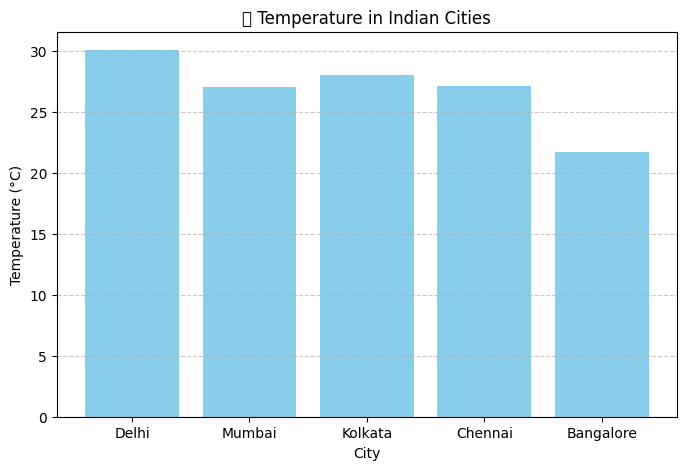

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(df['City'], df['Temperature (°C)'], color='skyblue')
plt.title("🌡️ Temperature in Indian Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q4. Annotate an image and text Using CVAT (Computer Vision Annotation
Tool) and Labelbox respectively.